In [1]:
from sklearn import linear_model
from exchange.board import *
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

history = load_file('../DATA/BF-TEST.log')
df = history.dollar_bar(tick_vol=50)

In [2]:
close_price  = df[['close']]
close_price.reset_index(inplace=True)

x = close_price['time'].values
X = close_price['time']

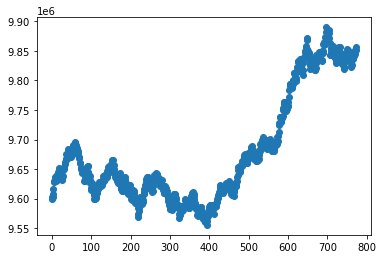

In [3]:
plt.scatter(X, df['close'])
plt.show()



In [4]:
y = close_price['close'].values
Y = close_price['close'].values.reshape(-1, 1)


def linear_score(x, y, length=100, position=1):
    if len(x) < length + position:
        return None

    x = x[-length-position:-position]
    y = y[-length-position:-position]

    clf = linear_model.LinearRegression()
    clf.fit(x, y)

    return clf.coef_[0][0], clf.intercept_[0], clf.score(x, y)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_score(x_pos, y_target, length=100, position=1):
    if len(x_pos) < length + position:
        return None

    x_pos = x_pos[-length-position:-position].reshape(-1, 1)
    y_target = y_target[-length-position:-position].reshape(-1, 1)

    #x_pos = x_pos[-length-position:-position]
    #y_target = y_target[-length-position:-position]

    lr = LinearRegression()
    lr.fit(x_pos, y_target)

    y_predict = lr.predict(x_pos)

    error = mean_squared_error(y_target, y_predict) / length

    return lr.coef_[0][0], lr.intercept_[0], error



In [6]:

z = lowess(y, x, return_sorted=False, frac=1/5)
z

array([9651491.28073904, 9651567.89007569, 9651640.6449546 ,
       9651709.47974338, 9651774.33215078, 9651835.14480592,
       9651891.86709807, 9651944.45569134, 9651992.87434799,
       9652037.09324186, 9652077.08976224, 9652112.84849042,
       9652144.36038168, 9652171.62362453, 9652194.64284775,
       9652213.42994212, 9652228.0044857 , 9652238.39241256,
       9652244.6256113 , 9652246.7413404 , 9652244.78192575,
       9652238.79307661, 9652228.82477748, 9652214.93187614,
       9652197.17404719, 9652175.61661725, 9652150.33252111,
       9652121.40418366, 9652088.92356222, 9652052.99067654,
       9652013.7121554 , 9651971.20265737, 9651925.58286022,
       9651876.97899557, 9651825.52194293, 9651771.34544989,
       9651714.58591719, 9651655.38077559, 9651593.86755107,
       9651530.18474481, 9651464.4717939 , 9651396.86822354,
       9651327.51339345, 9651256.54649752, 9651184.1066638 ,
       9651110.33310127, 9651035.36524387, 9650959.34294569,
       9650882.40692948,

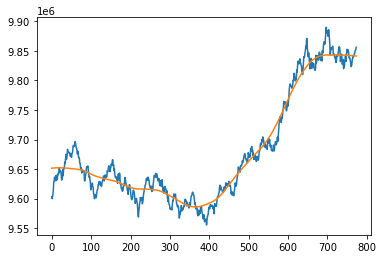

In [7]:
plt.plot(x, y)
plt.plot(x, z)
plt.show()

In [8]:
type(z)

numpy.ndarray

In [9]:
score = linear_score(x, z, 100)

score

(5.5951989099551005, 9838378.94213842, 7406.38117638696)

In [10]:
score = linear_score(x, z, 400, 100)

score

(658.9542155594052, 9358069.115193246, 2301033.581412565)

In [11]:
score = linear_score(x, z)

score

(5.5951989099551005, 9838378.94213842, 7406.38117638696)

In [12]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [15]:

for i in range(10, 500):
    slope, y_intercept, mse = linear_score(x, z, i, 100)
    print(mse, slope, y_intercept)

582.0296762857994 417.60149178642655 9558207.698868522
789.5908747807683 428.2384098038926 9551080.963796817
1040.390931430582 438.9091788048731 9543935.105489163
1338.184592826514 449.6045498657602 9536776.337125743
1686.740524304685 460.3179976427415 9529609.040562939
2089.8686704928896 471.0451062150034 9522436.180630956
2551.393335920925 481.7827014558646 9515259.887811646
3075.0692517793645 492.5279311263231 9508082.07439178
3664.5256605760806 503.2778915312869 9500904.6841614
4323.200313491701 514.0293620065967 9493729.869530877
5054.288968981677 524.778731334991 9486560.040188838
5860.6345522727015 535.5217137521494 9479398.05191073
6744.54083550646 546.252898040635 9472247.50611317
7707.58805053156 556.9654842040009 9465112.923728367
8750.450019279951 567.6511389465888 9457999.839554718
9872.76326840474 578.3000723410497 9450914.749202939
11073.19320046165 588.9016427809207 9443864.704860425
12349.517388106942 599.4448369380146 9436856.99514401
13698.654643513446 609.9184848714

In [16]:
x


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
from scipy import signal
maxId = signal.argrelmax(y, order=30)
minId = signal.argrelmin(y, order=30)

maxId
minId


(array([  1, 220, 324, 393, 462, 561, 669, 741]),)

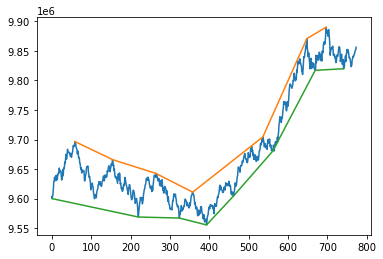

In [25]:
plt.plot(x, y)
plt.plot(x[maxId], y[maxId])
plt.plot(x[minId], y[minId])
plt.show()

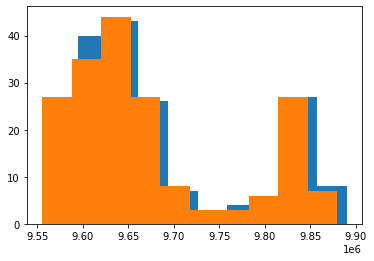

In [29]:
from scipy import signal
maxId = signal.argrelmax(y, order=1)
minId = signal.argrelmin(y, order=1)
maxId

plt.hist(y[maxId])
plt.hist(y[minId])
plt.show()